## **Capstone Project: Predicting Term Deposit Subscription**
## **Modeling**

## ***I. Importing the Libraries***

In [ ]:
#Load the packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import classification_report
from google.colab import files
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

%matplotlib inline

## ***II. Getting the data***

In [ ]:
#Load the data
banks6 = pd.read_csv('bank-full-finaldata.csv')

In [ ]:
#View the data
banks6.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## ***III. Structure Investigation***

In [ ]:
#Show columns of the data
banks6.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#Show size of the dataset
banks6.shape

(45211, 17)

In [ ]:
#Show dataframe information
banks6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Count how many times each data type is present in the dataset
pd.value_counts(banks6.dtypes)

object    10
int64      7
dtype: int64

In [ ]:
#Show the number of null values per variable
banks6.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## *a. Dealing with outliers*

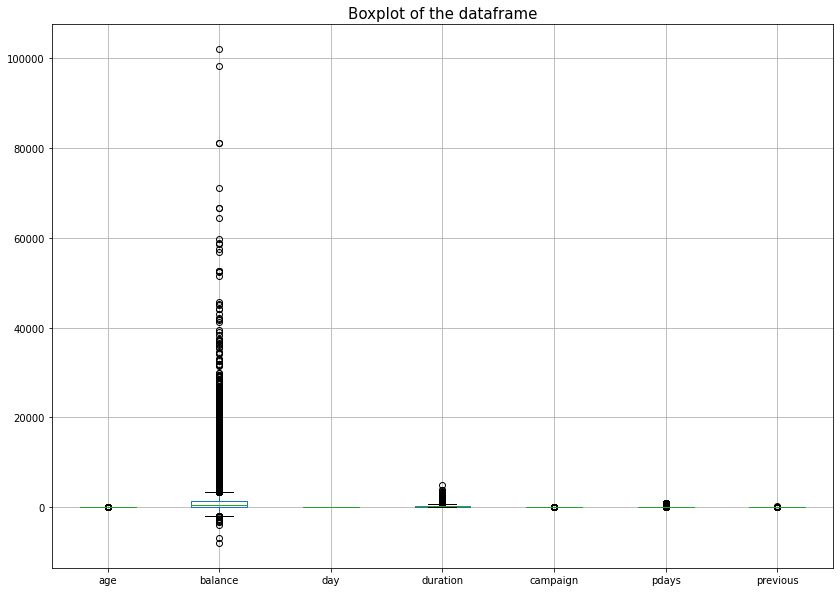

In [ ]:
#Checking for outliers in dataset
plt.figure(figsize=(14,10))
banks6.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

### *i. balance*

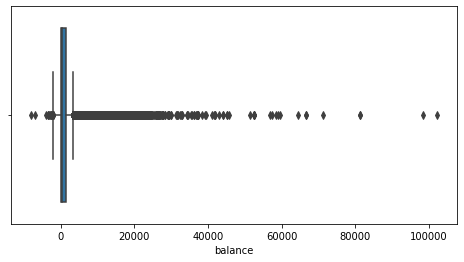

In [ ]:
#Looking inside balance variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=banks6['balance'])
plt.show()

In [ ]:
for x in ['balance']:
    q75,q25 = np.percentile(banks6.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    banks6.loc[banks6[x] < min,x] = np.nan
    banks6.loc[banks6[x] > max,x] = np.nan

### *ii. age*

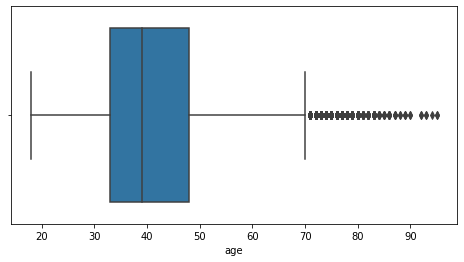

In [ ]:
#Looking inside age variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=banks6['age'])
plt.show()

In [ ]:
for y in ['age']:
    q75_age,q25_age = np.percentile(banks6.loc[:,y],[75,25])
    intr_qr_age = q75_age-q25_age
 
    max_age = q75_age+(1.5*intr_qr_age)
    min_age = q25_age-(1.5*intr_qr_age)
 
    banks6.loc[banks6[y] < min_age,y] = np.nan
    banks6.loc[banks6[y] > max_age,y] = np.nan

### *iii. campaign*

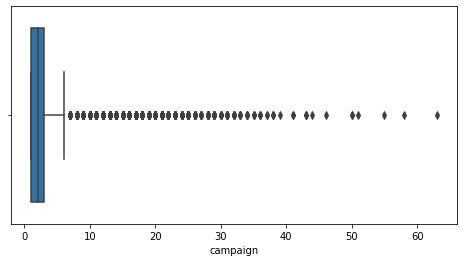

In [ ]:
#Looking inside campaign variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=banks6['campaign'])
plt.show()

In [ ]:
for z in ['campaign']:
    q75_c,q25_c = np.percentile(banks6.loc[:,z],[75,25])
    intr_qr_c = q75_c-q25_c
 
    max_c = q75_c+(1.5*intr_qr_c)
    min_c = q25_c-(1.5*intr_qr_c)
 
    banks6.loc[banks6[z] < min_c,z] = np.nan
    banks6.loc[banks6[z] > max_c,z] = np.nan

In [ ]:
#Show the number of null values per variable
banks6.isnull().sum()

age           487
job             0
marital         0
education       0
default         0
balance      4729
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign     3064
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

In [ ]:
#Dropping the rows will null values 
banks6 = banks6.dropna(axis = 0)

In [ ]:
#Rechecking if there are still null values
banks6.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### *iv. duration*

We can drop the 'duration' variable as the value of the variable will only be known at the end of the call. In order to make the prediction model more realistic.

In [ ]:
#Dropping the variable 'duration'
banks6 = banks6.drop(['duration'], axis=1)

## *b. Imputing missing values*

### *i. job*

In [ ]:
#Percentages of each value under the variable 'job'
banks6['job'].value_counts(normalize=True) * 100

blue-collar      22.334074
management       20.160103
technician       16.941983
admin.           11.860459
services          9.595459
retired           4.050762
self-employed     3.421595
entrepreneur      3.290407
unemployed        2.931648
housemaid         2.685336
student           2.160585
unknown           0.567589
Name: job, dtype: float64

In [ ]:
#Imputing 'unknown' (considered missing) data
#Replaced 'unknown' data into 'blue-collar' since 'blue-collar' data is the mode
banks6['job'] = banks6['job'].replace('unknown', 'blue-collar')

In [ ]:
#Checking the different types of job
banks6['job'].head(15)

0       management
1       technician
2     entrepreneur
3      blue-collar
4      blue-collar
5       management
6       management
7     entrepreneur
8          retired
9       technician
10          admin.
11          admin.
12      technician
13      technician
14        services
Name: job, dtype: object

In [ ]:
#Renaming 'admin.' into 'admin' (removed the dot) to make the data look cleaner
banks6['job'] = banks6['job'].replace('admin.', 'admin')

In [ ]:
banks6['job'].head(15)

0       management
1       technician
2     entrepreneur
3      blue-collar
4      blue-collar
5       management
6       management
7     entrepreneur
8          retired
9       technician
10           admin
11           admin
12      technician
13      technician
14        services
Name: job, dtype: object

### *ii. education*

In [ ]:
#Percentages of each value under the variable 'education'
banks6['education'].value_counts(normalize=True) * 100

secondary    52.831249
tertiary     28.349977
primary      14.891168
unknown       3.927606
Name: education, dtype: float64

In [ ]:
#Checking the different types of job
banks6['education'].head(15)

0      tertiary
1     secondary
2     secondary
3     secondary
4     secondary
5      tertiary
6      tertiary
7      tertiary
8       primary
9     secondary
10    secondary
11    secondary
12    secondary
13    secondary
14    secondary
Name: education, dtype: object

In [ ]:
#Imputing 'unknown' (considered missing) data
#Replaced 'unknown' data into 'secondary' since 'secondary' data is the mode
banks6['education'] = banks6['education'].replace('unknown', 'secondary')

In [ ]:
banks6['education'].head(15)

0      tertiary
1     secondary
2     secondary
3     secondary
4     secondary
5      tertiary
6      tertiary
7      tertiary
8       primary
9     secondary
10    secondary
11    secondary
12    secondary
13    secondary
14    secondary
Name: education, dtype: object

### *iii. contact*

In [ ]:
#Percentages of each value under the variable 'contact'
banks6['contact'].value_counts(normalize=True) * 100

cellular     65.053144
unknown      29.514605
telephone     5.432251
Name: contact, dtype: float64

In [ ]:
#Imputing 'unknown' (considered missing) data
#Replaced 'unknown' data into 'no
banks6['contact'] = banks6['contact'].replace('unknown', 'no')

In [ ]:
#Investigating 'unknown' values
print("# Missing value 'age' variable: {0}".format(len(banks6.loc[banks6['age'] == "unknown"])))
print("# Missing value 'job' variable: {0}".format(len(banks6.loc[banks6['job'] == "unknown"])))
print("# Missing value 'marital' variable: {0}".format(len(banks6.loc[banks6['marital'] == "unknown"])))
print("# Missing value 'education' variable: {0}".format(len(banks6.loc[banks6['education'] == "unknown"])))
print("# Missing value 'default' variable: {0}".format(len(banks6.loc[banks6['default'] == "unknown"])))
print("# Missing value 'balance' variable: {0}".format(len(banks6.loc[banks6['balance'] == "unknown"])))
print("# Missing value 'housing' variable: {0}".format(len(banks6.loc[banks6['housing'] == "unknown"])))
print("# Missing value 'loan' variable: {0}".format(len(banks6.loc[banks6['loan'] == "unknown"])))
print("# Missing value 'contact' variable: {0}".format(len(banks6.loc[banks6['contact'] == "unknown"])))
print("# Missing value 'day' variable: {0}".format(len(banks6.loc[banks6['day'] == "unknown"])))
print("# Missing value 'month' variable: {0}".format(len(banks6.loc[banks6['month'] == "unknown"])))
print("# Missing value 'campaign' variable: {0}".format(len(banks6.loc[banks6['campaign'] == "unknown"])))
print("# Missing value 'pdays' variable: {0}".format(len(banks6.loc[banks6['pdays'] == "unknown"])))
print("# Missing value 'previous' variable: {0}".format(len(banks6.loc[banks6['previous'] == "unknown"])))
print("# Missing value 'poutcome' variable: {0}".format(len(banks6.loc[banks6['poutcome'] == "unknown"])))

# Missing value 'age' variable: 0
# Missing value 'job' variable: 0
# Missing value 'marital' variable: 0
# Missing value 'education' variable: 0
# Missing value 'default' variable: 0
# Missing value 'balance' variable: 0
# Missing value 'housing' variable: 0
# Missing value 'loan' variable: 0
# Missing value 'contact' variable: 0
# Missing value 'day' variable: 0
# Missing value 'month' variable: 0
# Missing value 'campaign' variable: 0
# Missing value 'pdays' variable: 0
# Missing value 'previous' variable: 0
# Missing value 'poutcome' variable: 30409


## *b. Dropping unnecessary column(s)*

In [ ]:
#Dropping the column 'poutcome' since 
banks6 = banks6.drop('poutcome', axis=1)

In [ ]:
#Investigating 'unknown' values
#Variable 'poutcome' dropped
print("# Missing value 'age' variable: {0}".format(len(banks6.loc[banks6['age'] == "unknown"])))
print("# Missing value 'job' variable: {0}".format(len(banks6.loc[banks6['job'] == "unknown"])))
print("# Missing value 'marital' variable: {0}".format(len(banks6.loc[banks6['marital'] == "unknown"])))
print("# Missing value 'education' variable: {0}".format(len(banks6.loc[banks6['education'] == "unknown"])))
print("# Missing value 'default' variable: {0}".format(len(banks6.loc[banks6['default'] == "unknown"])))
print("# Missing value 'balance' variable: {0}".format(len(banks6.loc[banks6['balance'] == "unknown"])))
print("# Missing value 'housing' variable: {0}".format(len(banks6.loc[banks6['housing'] == "unknown"])))
print("# Missing value 'loan' variable: {0}".format(len(banks6.loc[banks6['loan'] == "unknown"])))
print("# Missing value 'contact' variable: {0}".format(len(banks6.loc[banks6['contact'] == "unknown"])))
print("# Missing value 'day' variable: {0}".format(len(banks6.loc[banks6['day'] == "unknown"])))
print("# Missing value 'month' variable: {0}".format(len(banks6.loc[banks6['month'] == "unknown"])))
print("# Missing value 'campaign' variable: {0}".format(len(banks6.loc[banks6['campaign'] == "unknown"])))
print("# Missing value 'pdays' variable: {0}".format(len(banks6.loc[banks6['pdays'] == "unknown"])))
print("# Missing value 'previous' variable: {0}".format(len(banks6.loc[banks6['previous'] == "unknown"])))

# Missing value 'age' variable: 0
# Missing value 'job' variable: 0
# Missing value 'marital' variable: 0
# Missing value 'education' variable: 0
# Missing value 'default' variable: 0
# Missing value 'balance' variable: 0
# Missing value 'housing' variable: 0
# Missing value 'loan' variable: 0
# Missing value 'contact' variable: 0
# Missing value 'day' variable: 0
# Missing value 'month' variable: 0
# Missing value 'campaign' variable: 0
# Missing value 'pdays' variable: 0
# Missing value 'previous' variable: 0


In [ ]:
#Show a summary of the data
banks6.describe()

,age,balance,day,campaign,pdays,previous
count,37351.000000,37351.000000,37351.000000,37351.000000,37351.000000,37351.000000
mean,40.260475,640.288212,15.469412,2.134668,41.943509,0.578432
std,9.936789,842.567239,8.294923,1.317279,102.984578,2.339453
min,18.000000,-1944.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,47.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,350.000000,15.000000,2.000000,-1.000000,0.000000
75%,48.000000,979.000000,21.000000,3.000000,-1.000000,0.000000
max,70.000000,3462.000000,31.000000,6.000000,871.000000,275.000000


In [ ]:
#Summary of the dataframe
banks6.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,no,5,may,1.0,-1,0,no
1,44.0,technician,single,secondary,no,29.0,yes,no,no,5,may,1.0,-1,0,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,no,5,may,1.0,-1,0,no
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,no,5,may,1.0,-1,0,no
4,33.0,blue-collar,single,secondary,no,1.0,no,no,no,5,may,1.0,-1,0,no
5,35.0,management,married,tertiary,no,231.0,yes,no,no,5,may,1.0,-1,0,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,no,5,may,1.0,-1,0,no
7,42.0,entrepreneur,divorced,tertiary,yes,2.0,yes,no,no,5,may,1.0,-1,0,no
8,58.0,retired,married,primary,no,121.0,yes,no,no,5,may,1.0,-1,0,no
9,43.0,technician,single,secondary,no,593.0,yes,no,no,5,may,1.0,-1,0,no


In [ ]:
#Rechecking the shape of the dataframe
banks6.shape

(37351, 15)

### *d. Converting the target variable 'y' into '0' and '1'*

In [ ]:
#Changing yes to 1 and no to 0
banks6['y'] = banks6['y'].map({'yes': 1, 'no': 0})

In [ ]:
#How many people(client) have subscribed to a term deposit?    
banks6.y.value_counts() 

0    33126
1     4225
Name: y, dtype: int64

## **IV. Correlation table and Heatmap**

In [ ]:
#Calculating correlation
corr_matrix = banks6.corr()
print(corr_matrix)

               age   balance       day  campaign     pdays  previous         y
age       1.000000  0.083464 -0.008343  0.038840 -0.029990 -0.006752 -0.016984
balance   0.083464  1.000000  0.007037 -0.024644  0.027265  0.034060  0.087320
day      -0.008343  0.007037  1.000000  0.102572 -0.083853 -0.044462 -0.025958
campaign  0.038840 -0.024644  0.102572  1.000000 -0.068166 -0.005904 -0.063334
pdays    -0.029990  0.027265 -0.083853 -0.068166  1.000000  0.442701  0.100359
previous -0.006752  0.034060 -0.044462 -0.005904  0.442701  1.000000  0.091997
y        -0.016984  0.087320 -0.025958 -0.063334  0.100359  0.091997  1.000000


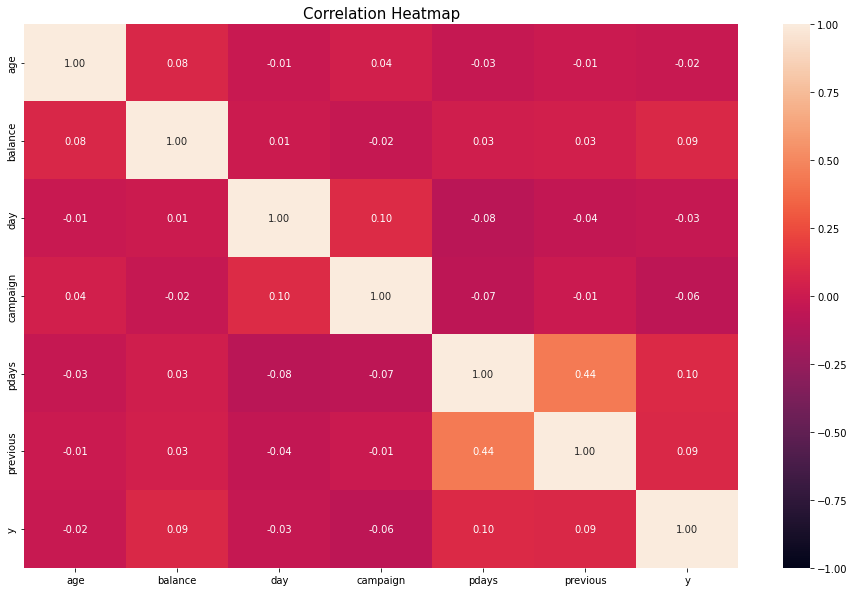

In [ ]:
#Creating correlation heat map
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,fmt='.2f')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

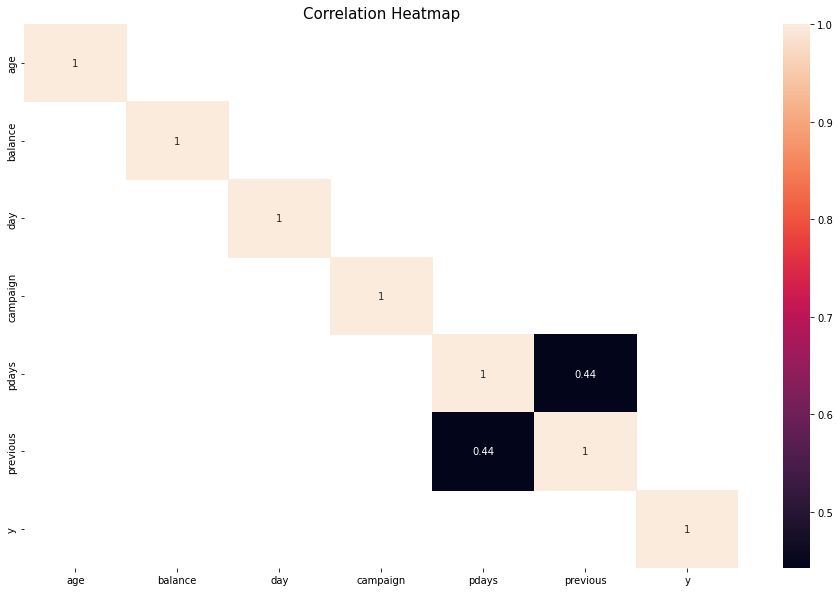

In [ ]:
#Plotting the heatmap of only highly correlated varibles with threshold value 0.4
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix[corr_matrix > 0.4], annot=True)
plt.title("Correlation Heatmap",  fontsize = 15)
plt.show()

## **V. Analysis Preparation**

### *a. Class Imbalance*

In [ ]:
#Checking for class imbalance
class_values = (banks6['y'].value_counts()/banks6['y'].value_counts().sum())*100
print(class_values)

0    88.688389
1    11.311611
Name: y, dtype: float64


Note: The class distribution in the target is 89:11. This is a clear indication of imbalance.

### *b. Transforming variables*

In [ ]:
#Create a list of element containing the string 'purpose, job,etc.'. Call this list cat_list.
cat_list = ['job','marital','education','default','housing','loan','contact','month']

In [ ]:
#Getting dummies
new_banks = pd.get_dummies(banks6, columns = cat_list)

In [ ]:
banks6 = new_banks.dropna()

In [ ]:
banks6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37351 entries, 0 to 45210
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  37351 non-null  float64
 1   balance              37351 non-null  float64
 2   day                  37351 non-null  int64  
 3   campaign             37351 non-null  float64
 4   pdays                37351 non-null  int64  
 5   previous             37351 non-null  int64  
 6   y                    37351 non-null  int64  
 7   job_admin            37351 non-null  uint8  
 8   job_blue-collar      37351 non-null  uint8  
 9   job_entrepreneur     37351 non-null  uint8  
 10  job_housemaid        37351 non-null  uint8  
 11  job_management       37351 non-null  uint8  
 12  job_retired          37351 non-null  uint8  
 13  job_self-employed    37351 non-null  uint8  
 14  job_services         37351 non-null  uint8  
 15  job_student          37351 non-null 

In [ ]:
banks6.head()

,age,balance,day,campaign,pdays,previous,y,job_admin,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,2143.0,5,1.0,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44.0,29.0,5,1.0,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33.0,2.0,5,1.0,-1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47.0,1506.0,5,1.0,-1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33.0,1.0,5,1.0,-1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
banks6.shape

(37351, 45)

### *c. Train Test Split*

In [ ]:
#Split the datasets into training and test data
X = banks6.drop('y', axis=1)
y = banks6.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size= 0.40)

In [ ]:
X_train.shape

(22410, 44)

In [ ]:
X_test.shape

(14941, 44)

In [ ]:
y_train.shape

(22410,)

In [ ]:
y_test.shape

(14941,)

In [ ]:
#Standardization of the data
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### *d. Applying SMOTE: Synthetic Minority Oversampling Technique*

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


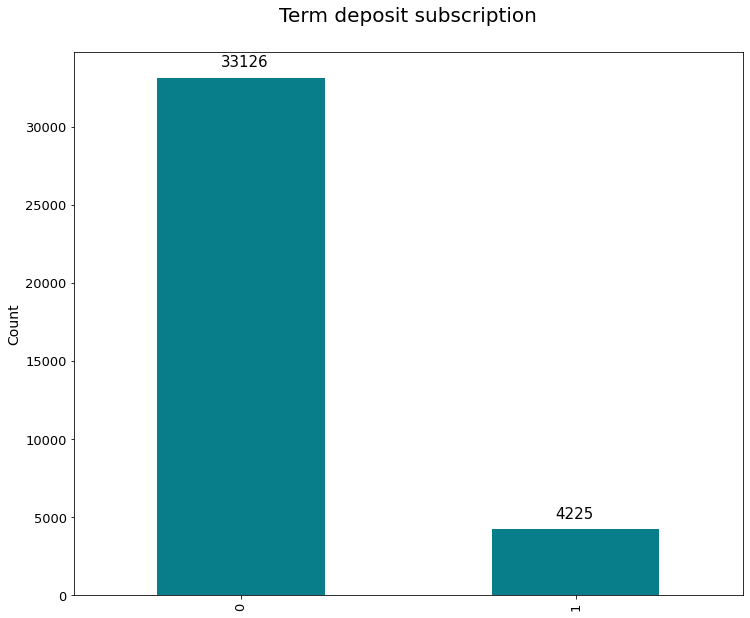

In [ ]:
#Check how many clients subscribed for a term deposit
ax = banks6['y'].value_counts().plot(kind='bar', figsize=(12, 10), fontsize=13, color='#087E8B')
ax.set_title('Term deposit subscription', size=20, pad=30)
ax.set_ylabel('Count', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [ ]:
#Applying smote to the imbalanced proportion
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (37351, 44)
Shape of X after SMOTE: (66252, 44)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: y, dtype: float64

### *e. Helper function*

Built a helper function to utilize this feature and make the code more comprehensible.

In [ ]:
def model_perf_v1(model,X_train, X_val, y_train, y_val):
    
    pred_dt = model.predict(X_val)
    print("Accuracy on training set:")
    pred = model.predict(X_train)
    print(metrics.accuracy_score(y_true = y_train, y_pred = pred))
    #
    print("Accuracy on testing set:")
    accuracy = (metrics.accuracy_score(y_true = y_val, y_pred = pred_dt))
    print(accuracy)
    #confusion matrix
    confusion_matrix_ =  pd.crosstab(index=y_val, columns=pred_dt.ravel(), rownames=['Expected'], colnames=['Predicted'])
    #visualization
    sns.heatmap(confusion_matrix_, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()
    #
    print("Recall:")
    recall = (metrics.recall_score(y_val,pred_dt))
    #recall_no = (metrics.recall_score(y_val,pred_dt))
    print(recall)
    #print(recall_no)
    # #
    print("Specificity:")
    tn, fp, fn, tp = confusion_matrix(y_val,pred_dt).ravel()
    spec = tn/(tn+fp)
    Specificity = (spec)
    print(Specificity)

    # #
    print("Precision:")
    Precision = (metrics.precision_score(y_val,pred_dt))
    print(Precision)
    # #
    print("Balanced Accuracy:")
    Balanced_Accuracy = (metrics.balanced_accuracy_score(y_val,pred_dt))
    print(Balanced_Accuracy)
    # #
    print("F1 score:")
    F1_score = (metrics.f1_score(y_val,pred_dt))
    print(F1_score)
    #classification_report
    # print(metrics.classification_report(y_test, pred_dt))
    return accuracy,recall,Specificity,Precision,F1_score,Balanced_Accuracy

In [ ]:
def model_perf_to_lst(model,X_val, y_val):
    lst = [str(model)]
    pred_dt = model.predict(X_val)
    #print("Accuracy on testing set:")
    lst.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_dt))
    #print("Recall:")
    lst.append(metrics.recall_score(y_val,pred_dt))
    #
    #print("Specificity:")
    tn, fp, fn, tp = confusion_matrix(y_val,pred_dt).ravel()
    spec = tn/(tn+fp)
    lst.append(spec)
    #
    #print("Precision:")
    lst.append(metrics.precision_score(y_val,pred_dt))
    #
    #print("Balanced Accuracy:")
    lst.append(metrics.balanced_accuracy_score(y_val,pred_dt))
    #
    #print("F1 score:")
    lst.append(metrics.f1_score(y_val,pred_dt))
    return lst

In [ ]:
best_cl_normal = pd.DataFrame(columns = ['Model','Accuracy','Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1 score'])

# **VI. Modelling**

### *a. Random Forest Classifier*

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Accuracy on training set:
0.9999698122320836
Accuracy on testing set:
0.6658858175490262


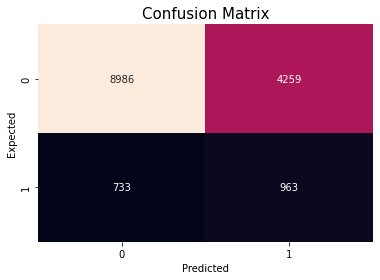

Recall:
0.5678066037735849
Specificity:
0.6784446961117403
Precision:
0.18441210264266564
Balanced Accuracy:
0.6231256499426626
F1 score:
0.27840416305290544


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
rf = RandomForestClassifier()
#Fitting the model
rf.fit(X_sm,y_sm)
Accuracy_rf_sm, Recall_rf_sm, Specificity_rf_sm, Precision_rf_sm, F1_score_rf_sm, Balanced_Accuracy_rf_sm = model_perf_v1(rf,X_sm, X_test, y_sm, y_test)
rf_perf = model_perf_to_lst(rf, X_test, y_test) 

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = rf_perf

In [ ]:
print(len(rf.estimators_))
print(rf.estimators_[0].tree_.max_depth)

100
38


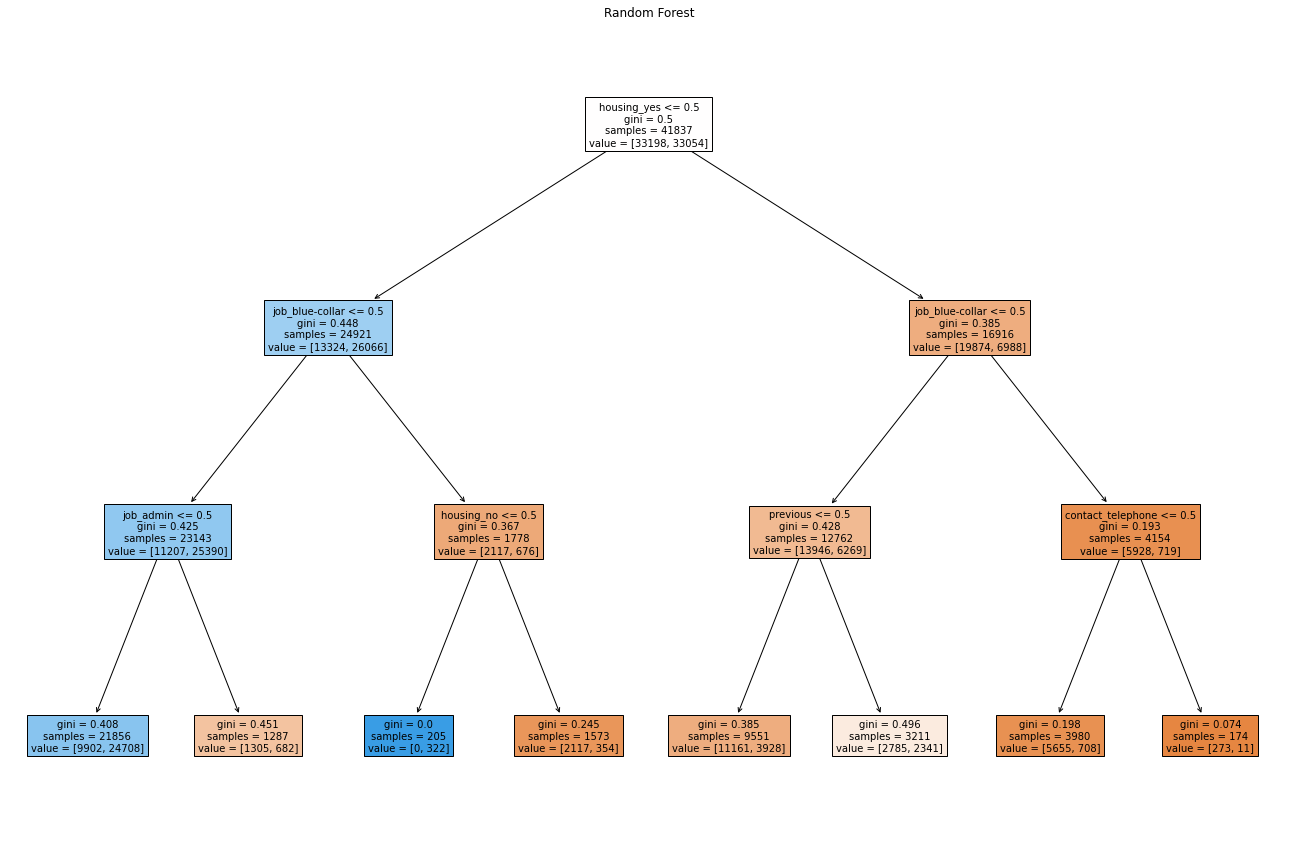

In [ ]:
# Plotting random forest with 3 levels only 
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(X_sm,y_sm)
fig=plt.figure(figsize=(23,15))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True,fontsize=10)
plt.title('Random Forest');

### *b. Decision Tree Classifier*

Accuracy on training set:
1.0
Accuracy on testing set:
0.5685027775918613


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


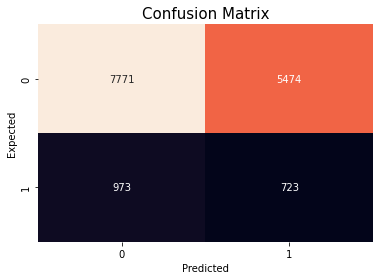

Recall:
0.42629716981132076
Specificity:
0.586711966779917
Precision:
0.11666935614006778
Balanced Accuracy:
0.5065045682956189
F1 score:
0.18320030406689475


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_sm, y_sm)
Accuracy_dt_sm,Recall_dt_sm,Specificity_dt_sm,Precision_dt_sm,F1_score_dt_sm,Balanced_Accuracy_dt_sm = model_perf_v1(dt,X_sm, X_test,y_sm,y_test)
dt_perf = model_perf_to_lst(dt, X_test, y_test) 

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = dt_perf

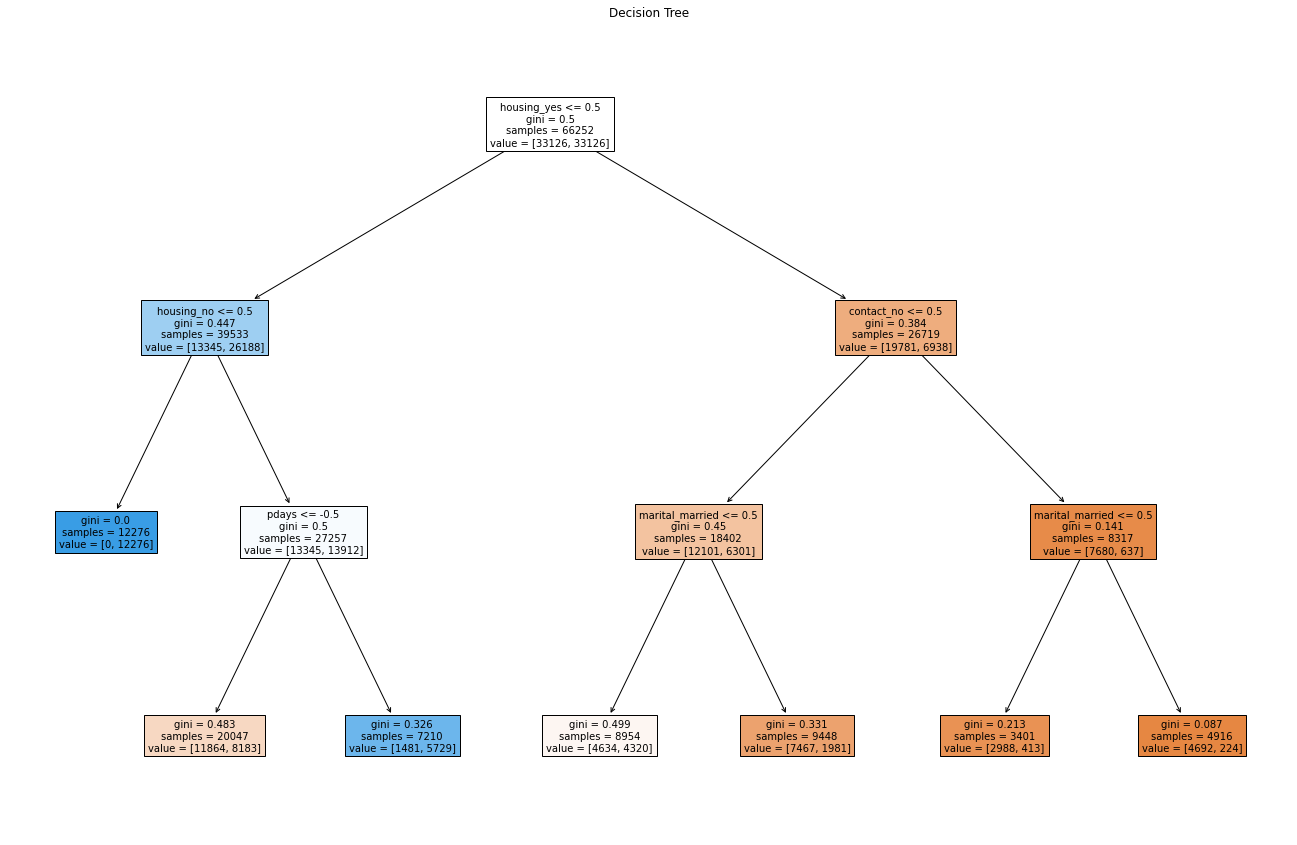

In [ ]:
# Plotting Decision Tree with 3 levels only 
dt = DecisionTreeClassifier(max_depth=3)
fig=plt.figure(figsize=(23,15))
tree.plot_tree(decision_tree=dt.fit(X_sm, y_sm),feature_names=X.columns, filled=True,fontsize=10);
plt.title('Decision Tree');

### *c. Logistic Regression Classifier*

Accuracy on training set:
0.9338435066111211
Accuracy on testing set:
0.12783615554514424


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


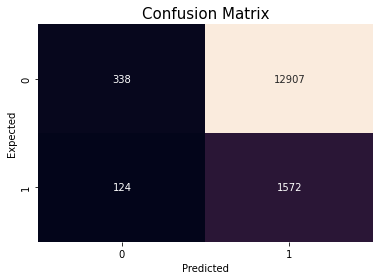

Recall:
0.9268867924528302
Specificity:
0.025519063797659496
Precision:
0.10857103391118171
Balanced Accuracy:
0.47620292812524484
F1 score:
0.19437403400309117


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
log = LogisticRegression(max_iter=5000)
#Fitting the model
log.fit(X_sm, y_sm)
Accuracy_log_sm, Recall_log_sm, Specificity_log_sm, Precision_log_sm, F1_score_log_sm, Balanced_Accuracy_log_sm = model_perf_v1(log,X_sm,X_test,y_sm,y_test)
log_perf = model_perf_to_lst(log, X_test, y_test) 

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = log_perf

### *d. Gradient Boost Classifier*

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


Accuracy on training set:
0.9300851295055244
Accuracy on testing set:
0.7728398366909845


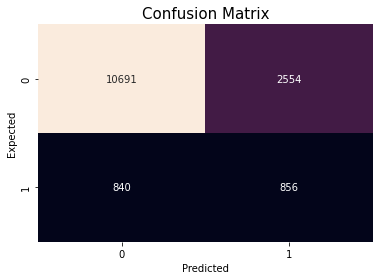

Recall:
0.5047169811320755
Specificity:
0.8071725179312949
Precision:
0.25102639296187684
Balanced Accuracy:
0.6559447495316852
F1 score:
0.33529181355268317


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
grb = GradientBoostingClassifier()
grb.fit(X_sm, y_sm)
Accuracy_grb_sm, Recall_grb_sm, Specificity_grb_sm, Precision_grb_sm, F1_score_grb_sm, Balanced_Accuracy_grb_sm = model_perf_v1(grb,X_sm,X_test,y_sm,y_test)
grb_perf = model_perf_to_lst(grb, X_test, y_test) 

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = grb_perf

In [ ]:
best_cl_normal

,Model,Accuracy,Recall,Specificity,Precision,Balanced Accuracy,F1 score
0,RandomForestClassifier(),0.665886,0.567807,0.678445,0.184412,0.623126,0.278404
1,DecisionTreeClassifier(),0.568503,0.426297,0.586712,0.116669,0.506505,0.183200
2,LogisticRegression(max_iter=5000),0.127836,0.926887,0.025519,0.108571,0.476203,0.194374
3,GradientBoostingClassifier(),0.772840,0.504717,0.807173,0.251026,0.655945,0.335292


# **VII. Hyperparameter Tuning**

In [ ]:
# Helper function for grid search
def grid_search_helper():
    
    pipeline1 = Pipeline((
    ('clf', DecisionTreeClassifier()),
    ))

    pipeline2 = Pipeline((
    ('clf', LogisticRegression()),
    ))

    pipeline3 = Pipeline((
    ('clf', GradientBoostingClassifier()),
    ))

    parameters1 = {
    'clf__min_samples_split': [5, 10, 20, 30, 40, 50], 
    'clf__max_depth': list(range(1,15))
    }

    parameters2 = {
    'clf__C': np.logspace(0, 4, 10)
     }
    
    parameters3 ={
    'clf__n_estimators':[1, 2, 5, 10, 20, 50],
    'clf__learning_rate':[0.1, 0.3, 0.5, 0.7, 1]
    }

    pars = [parameters1, parameters2, parameters3]
    pips = [pipeline1, pipeline2, pipeline3]

    print("starting Gridsearch")
    dict_best_params ={}
    for i in range(len(pars)):
        print(pars[i])
        print(pips[i])
        gs = GridSearchCV(pips[i], pars[i], cv= 3, n_jobs=-1)
        gs.fit(X_train, y_train)
        print("finished Gridsearch\n")
        #print(gs.best_estimator_)
        dict_best_params[i]= gs.best_estimator_
    return dict_best_params

In [ ]:
best_params_dict = grid_search_helper()

starting Gridsearch
{'clf__min_samples_split': [5, 10, 20, 30, 40, 50], 'clf__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
Pipeline(steps=(('clf', DecisionTreeClassifier()),))
finished Gridsearch

{'clf__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])}
Pipeline(steps=(('clf', LogisticRegression()),))
finished Gridsearch

{'clf__n_estimators': [1, 2, 5, 10, 20, 50], 'clf__learning_rate': [0.1, 0.3, 0.5, 0.7, 1]}
Pipeline(steps=(('clf', GradientBoostingClassifier()),))
finished Gridsearch



### *a. Decision Tree Classifier*

Accuracy on training set:
0.5355159089536919
Accuracy on testing set:
0.8860852687236463


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


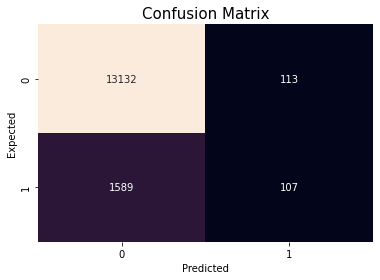

Recall:
0.06308962264150944
Specificity:
0.9914684786711967
Precision:
0.4863636363636364
Balanced Accuracy:
0.527279050656353
F1 score:
0.1116910229645094


In [ ]:
Accuracy_dt_h,Recall_dt_h,Specificity_dt_h,Precision_dt_h,F1_score_dt_h,Balanced_Accuracy_dt_h = model_perf_v1(best_params_dict[0],X_sm,X_test,y_sm,y_test)

### *b. Logistic Regression Classifier*

Accuracy on training set:
0.5525116222906479
Accuracy on testing set:
0.8865537781942306


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


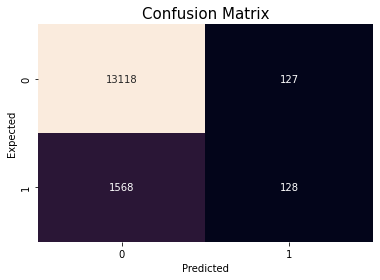

Recall:
0.07547169811320754
Specificity:
0.9904114760286901
Precision:
0.5019607843137255
Balanced Accuracy:
0.5329415870709489
F1 score:
0.13121476166068682


In [ ]:
Accuracy_log_h, Recall_log_h, Specificity_log_h, Precision_log_h, F1_score_log_h, Balanced_Accuracy_log_h = model_perf_v1(best_params_dict[1],X_sm,X_test,y_sm,y_test)

### *c. Gradient Boost Classifier*

Accuracy on training set:
0.4997132162047938
Accuracy on testing set:
0.8914396626731812


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


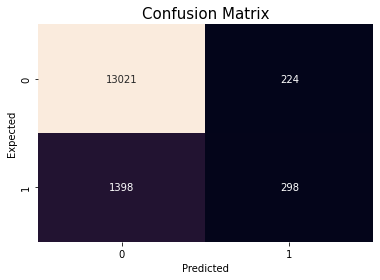

Recall:
0.17570754716981132
Specificity:
0.9830879577198943
Precision:
0.5708812260536399
Balanced Accuracy:
0.5793977524448528
F1 score:
0.26871055004508565


In [ ]:
Accuracy_grb_h, Recall_grb_h, Specificity_grb_h, Precision_grb_h, F1_score_grb_h, Balanced_Accuracy_grb_h = model_perf_v1(best_params_dict[2],X_sm,X_test,y_sm,y_test)

### *d. Random Forest Classifier*

In [ ]:
# 3 fold cross validation
k=3
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50], 
    max_depth = list(range(1,15)), 
    n_estimators = [1, 2, 5, 10, 20, 50] 
)
params

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'n_estimators': [1, 2, 5, 10, 20, 50]}

In [ ]:
rf_1 = RandomForestClassifier()
rf_gs = GridSearchCV(estimator=rf_1, param_grid=params, cv=k, n_jobs=-1 )
# fitting the random forest model
rf_gs.fit(X_sm, y_sm)
best_estimator_rf = rf_gs.best_estimator_

Accuracy on training set:
0.725864879550806
Accuracy on testing set:
0.5830265711799746


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


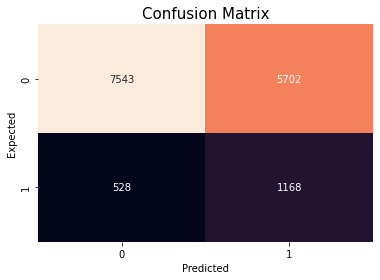

Recall:
0.6886792452830188
Specificity:
0.5694979237448093
Precision:
0.1700145560407569
Balanced Accuracy:
0.629088584513914
F1 score:
0.27270604716320335


In [ ]:
Accuracy_rf_h, Recall_rf_h, Specificity_rf_h, Precision_rf_h, F1_score_rf_h, Balanced_Accuracy_rf_h = model_perf_v1(best_estimator_rf,X_sm,X_test,y_sm,y_test)

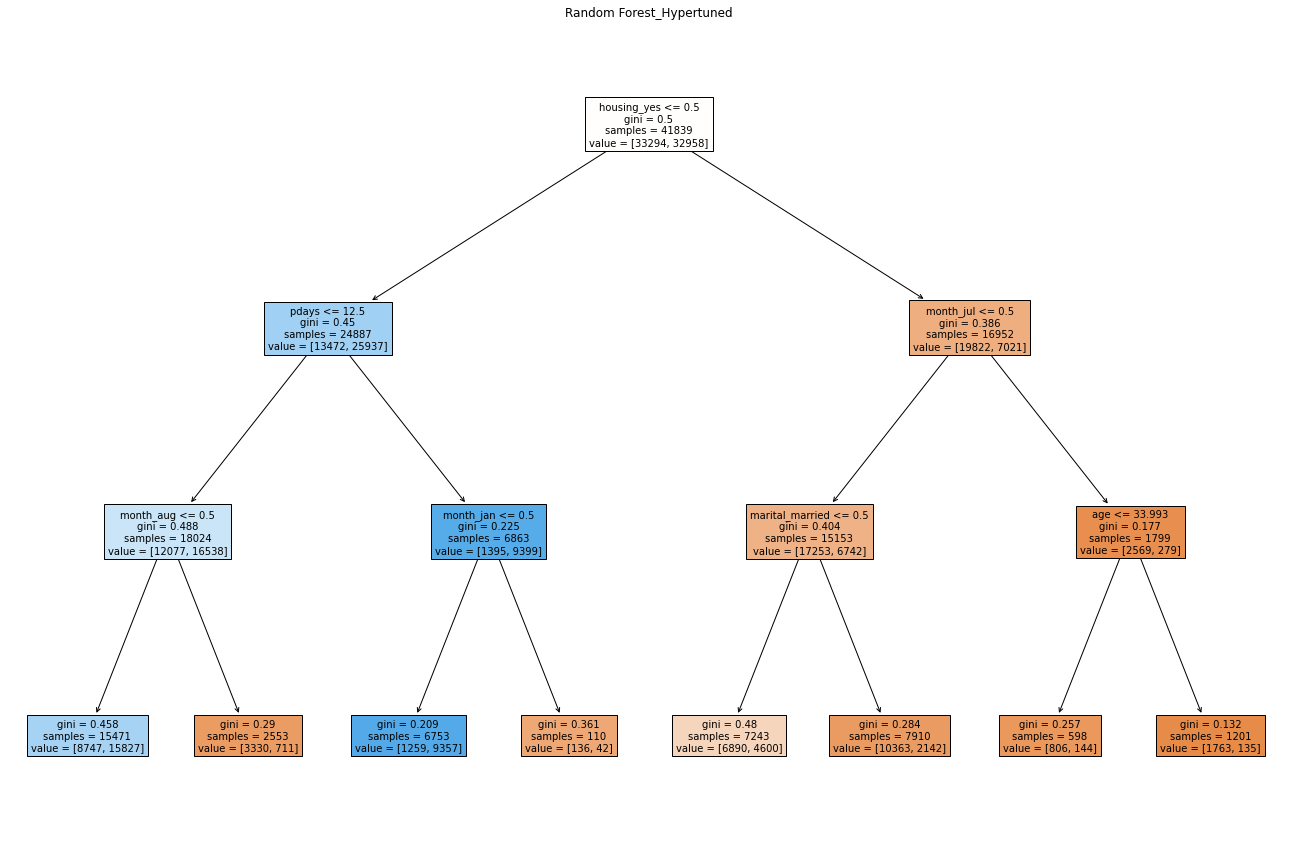

In [ ]:
# Plotting random forest with 3 levels only 
rf_1 = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_1.fit(X_sm,y_sm)
fig=plt.figure(figsize=(23,15))
_rf1 = tree.plot_tree(rf_1.estimators_[0], feature_names=X.columns, filled=True,fontsize=10)
plt.title('Random Forest_Hypertuned');

# **VII. Comparison table for the classification models (Hypertuned Parameters)**

In [ ]:
column_labels = ['classifier','accuracy','recall','specificity','precision','f1-score','balanced']

In [ ]:
df_1 = pd.DataFrame([['RandomForest_h',Accuracy_rf_h,Recall_rf_h,Specificity_rf_h,Precision_rf_h,F1_score_rf_h,Balanced_Accuracy_rf_h]],columns =column_labels )
df_2=  pd.DataFrame([['DecisionTree_h',Accuracy_dt_h,Recall_dt_h,Specificity_dt_h,Precision_dt_h,F1_score_dt_h,Balanced_Accuracy_dt_h]],columns =column_labels )
df_3 = pd.DataFrame([['LogisticRegression_h',Accuracy_log_h,Recall_log_h,Specificity_log_h,Precision_log_h,F1_score_log_h,Balanced_Accuracy_log_h]],columns =column_labels )
df_4 = pd.DataFrame([['GradientBoosting_h',Accuracy_grb_h,Recall_grb_h,Specificity_grb_h,Precision_grb_h,F1_score_grb_h,Balanced_Accuracy_grb_h]],columns =column_labels )

In [ ]:
combined_data= pd.concat([df_1, df_2, df_3, df_4])
combined_data

,classifier,accuracy,recall,specificity,precision,f1-score,balanced
0,RandomForest_h,0.583027,0.688679,0.569498,0.170015,0.272706,0.629089
0,DecisionTree_h,0.886085,0.063090,0.991468,0.486364,0.111691,0.527279
0,LogisticRegression_h,0.886554,0.075472,0.990411,0.501961,0.131215,0.532942
0,GradientBoosting_h,0.891440,0.175708,0.983088,0.570881,0.268711,0.579398


In [ ]:
m_accuracies = {'Decision Tree' : (Accuracy_dt_h*100) ,
                     'Logistic Regression' : (Accuracy_log_h*100), 
                     'GradientBoost' : (Accuracy_grb_h*100), 
                     'Random Forest' : (Accuracy_rf_h*100)}
m_accu_list = list(m_accuracies.keys())

# **VIII. Comparison plot for the classification models (Hypertuned Parameters)**

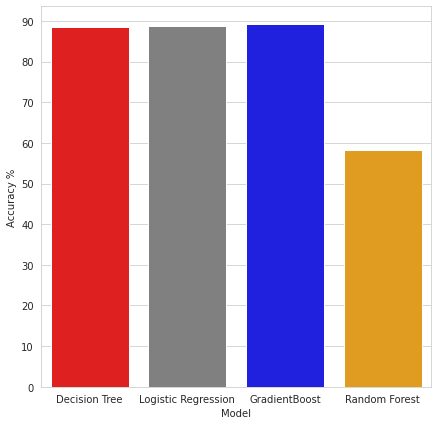

In [ ]:
colors = ["Red", "Gray", "Blue", "Orange"]
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
plt.yticks(np.arange(0,150,10))
plt.ylabel("Accuracy %")
plt.xlabel("Model")
sns.barplot(x=list(m_accuracies.keys()), y=list(m_accuracies.values()), palette=colors)
plt.show()

# **- End of Modeling -**

#Conclusion:
* The accuracy of the various models improved after a hyperparameter
adjustment using grid search. The Gradient Boost Classifier achieved the best
accuracy and precision, respectively, of **89.92** and **57.1**

* We use accuracy as our main criterion for selecting the best model because we are taking into account the balanced data set after hyperparameter tuning.

* The target variable ratio is 1:8 before adjusting the hyperparameter parameters. A 1:1 class ratio has been reached after using the SMOTE oversampling technique.

*Submitted by:*

*   Glen George A. Bautista
*   Maria Paula Sanchez Galindo